
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import metrics
import seaborn as sns

### polynomic regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model._ridge import _RidgeGCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## Espiamos el contenido del dataset

# Cargar datos
Cargar los datos de entrenamiento.

In [2]:
dataset_training = './Dataset/Training/Features_Variant_5.csv'
#dataset_testing = './Dataset/Testing/Features_TestSet.csv'

data_train = pd.read_csv(dataset_training, header=None)

X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1:]

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

## Attribute Information:

__1__--Page Popularity/likes-Defines the popularity or support for the source of the document.  
__2__-Page Checkinsâ€™s-Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc.  
__3__-Page talking about-Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.  
__4__-Page Category-Defines the category of the source of the document eg: place, institution, brand etc.  
__5 to 29__-These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.  
__30__-CC1-The total number of comments before selected base date/time.  
__31__-CC2-The number of comments in last 24 hours, relative to base date/time.   
__32__-CC3-The number of comments in last 48 to last 24 hours relative to base date/time.  
__33__-CC4-The number of comments in the first 24 hours after the publication of post but before base date/time.  
__34__-CC5-The difference between CC2 and CC3.  
__35__-Base time-Selected time in order to simulate the scenario.  
__36__-Post length-Character count in the post.  
__37__-Post Share Count-This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline.  
__38__-Post Promotion Status-To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0).  
__39__-H Local-This describes the H hrs, for which we have the target variable/ comments received.  
__40 to 46__-Post published weekday-This represents the day(Sunday...Saturday) on which the post was published.  
__47 to 53__-Base DateTime weekday-This represents the day(Sunday...Saturday) on selected base Date/Time.  
__54__-Target Variable-The no of comments in next H hrs(H is given in Feature no 39).  

In [3]:
X_train.shape, y_train.shape

((199030, 53), (199030, 1))

In [4]:
# #obtengo el parámetros de horas con el que se verifica
# hours_counters = np.bincount(X_train[:, 38].astype(int) ).flatten()
# #hours_counters.shape
# for c in range(len(hours_counters)):
#   if hours_counters[c] > 0:
#     print(f'Comentarios recibidos en las próximas {c} hs = {hours_counters[c]}')

# print(f'Media={np.mean(X_train[:, 38])}, Varianza={np.var(X_train[:, 38])}')

In [5]:
# visualizo parámetros descriptivos de cada atributo
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1702.000000


In [6]:
#verifico si existen nulos
nulls = data_train.isnull().sum()
np.sum(nulls)

0

In [7]:
# Verifico atributos que no tengan info
for i in range(len(X_train.columns)):
  attr = X_train.iloc[:, i]
  if np.min(attr) == np.max(attr):
    print(f'Attr {i+1} tiene siempre el mismo dato') 


Attr 38 tiene siempre el mismo dato


## Analizo las distribuciones de los atributos respecto de la variable objetivo

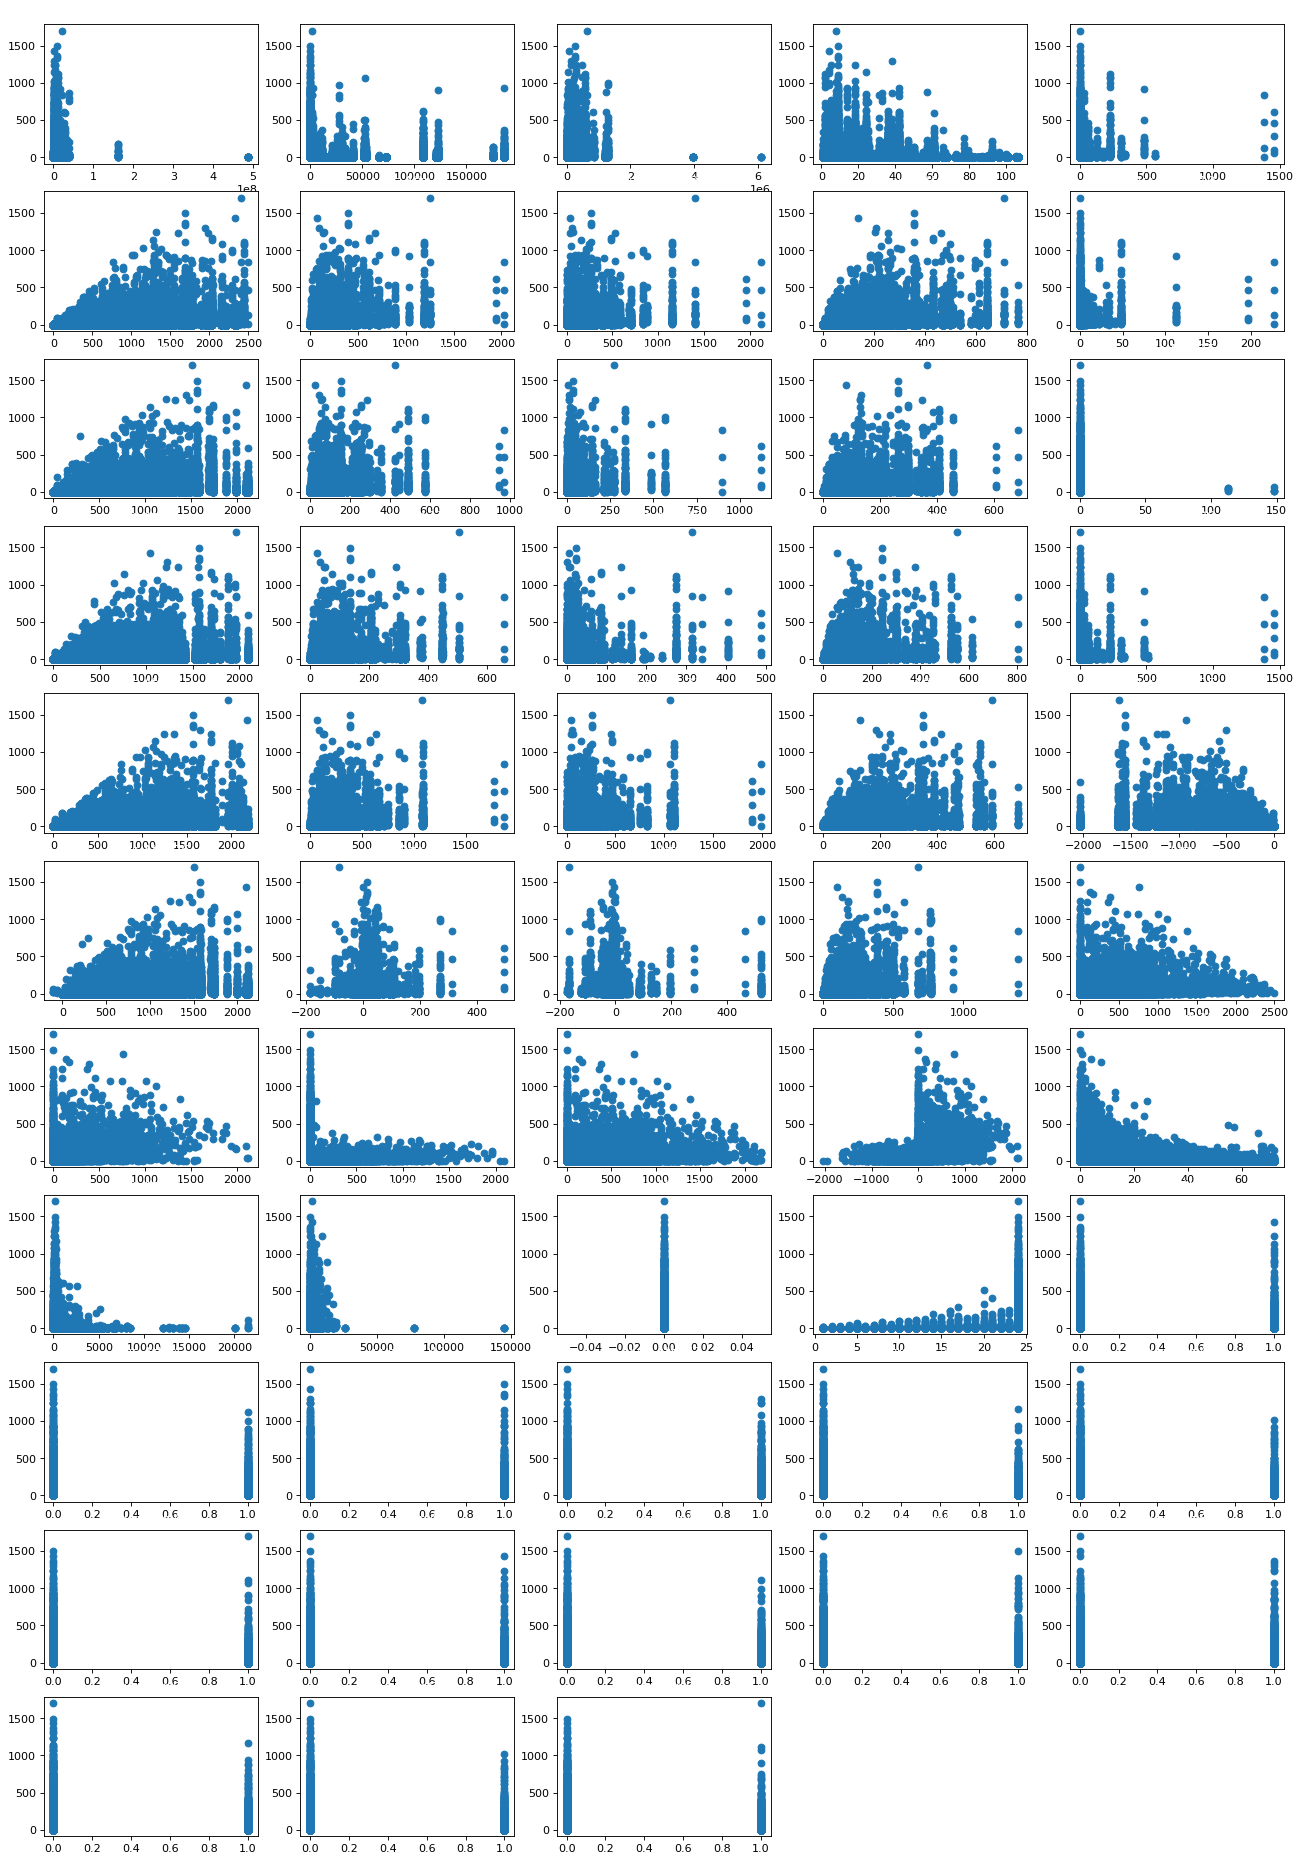

In [8]:
#attrs_to_check = [1, 2, 3, 4, 29, 30, 31, 32, 33, 35, 36, 37]
total_attrs = len(X_train.columns)

plt.figure(figsize=(20,30), dpi=80)
for i in range(total_attrs):
  plt.subplot(int(total_attrs / 5 + 1), 5, i+1) # subplot starts from 1 (not 0)

  plt.scatter(X_train.iloc[:, i], y_train)
  plt.title(f'y vs Attr {i + 1}', color='w')
plt.show()

In [9]:
# #attrs_to_check = [1, 2, 3, 4, 29, 30, 31, 32, 33, 35, 36, 37]
# total_attrs = X_train.shape[1]

# plt.figure(figsize=(20,30), dpi=80)
# for i in range(total_attrs):
#   plt.subplot(int(total_attrs / 5 + 1), 5, i+1) # subplot starts from 1 (not 0)

#   plt.scatter(X_train[:, i], y_train)
#   plt.title(f'y vs Attr {i + 1}', color='w')
# plt.show()


__Conclusiones:__ 
Verifico que los atributos 40 al 53 son binarios (0-1)

### Estudio de Correlación

__Nota__: La matriz presenta una fila y columna con NaN debido a que el atributo 38 es siempre 0

In [10]:
# calculo matriz de correlación entre atributos
corr_matrix = X_train.corr(method='pearson')
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.000000,0.045090,0.622700,-0.042003,0.046600,0.157902,0.165026,0.147022,0.173462,0.046528,...,-0.002845,-0.009949,0.002727,-0.003590,-0.001345,0.002757,0.007740,0.001449,-0.001514,-0.005663
1,0.045090,1.000000,0.167326,-0.060345,-0.007382,0.158831,0.151055,0.129424,0.169037,-0.006570,...,0.003324,-0.006156,0.008358,0.000764,0.000087,0.000197,-0.001587,0.002071,-0.001521,-0.000045
2,0.622700,0.167326,1.000000,-0.148164,0.118685,0.484869,0.515621,0.457754,0.539581,0.119260,...,-0.016740,-0.027714,-0.007980,-0.014358,-0.006598,0.004262,0.023153,0.022747,-0.009419,-0.021087
3,-0.042003,-0.060345,-0.148164,1.000000,-0.026591,-0.319812,-0.233917,-0.193385,-0.291309,-0.023868,...,0.009583,0.002795,-0.002126,0.002386,-0.004504,-0.003690,-0.001920,-0.001325,0.003916,0.005049
4,0.046600,-0.007382,0.118685,-0.026591,1.000000,0.072641,0.335366,0.409813,0.130532,0.930690,...,0.007466,-0.003884,-0.005278,-0.000426,-0.006805,0.001074,0.002660,-0.000129,0.006651,-0.003232
5,0.157902,0.158831,0.484869,-0.319812,0.072641,1.000000,0.715212,0.582076,0.896815,0.079879,...,-0.001245,-0.010944,-0.009929,-0.005159,-0.005468,0.001918,0.011149,0.007315,-0.001381,-0.008924
6,0.165026,0.151055,0.515621,-0.233917,0.335366,0.715212,1.000000,0.963216,0.903036,0.340154,...,-0.002837,-0.017454,-0.004056,-0.008361,-0.005993,0.003581,0.012472,0.009093,-0.003123,-0.008304
7,0.147022,0.129424,0.457754,-0.193385,0.409813,0.582076,0.963216,1.000000,0.773769,0.412988,...,-0.002334,-0.015895,-0.001976,-0.007473,-0.005297,0.003135,0.010544,0.008291,-0.002518,-0.007247
8,0.173462,0.169037,0.539581,-0.291309,0.130532,0.896815,0.903036,0.773769,1.000000,0.146383,...,-0.005194,-0.016705,-0.009671,-0.009642,-0.006710,0.003410,0.014783,0.011331,-0.003686,-0.010263
9,0.046528,-0.006570,0.119260,-0.023868,0.930690,0.079879,0.340154,0.412988,0.146383,1.000000,...,0.001684,-0.004534,-0.003742,-0.002532,-0.005779,0.001494,0.003371,0.003135,0.003903,-0.003902


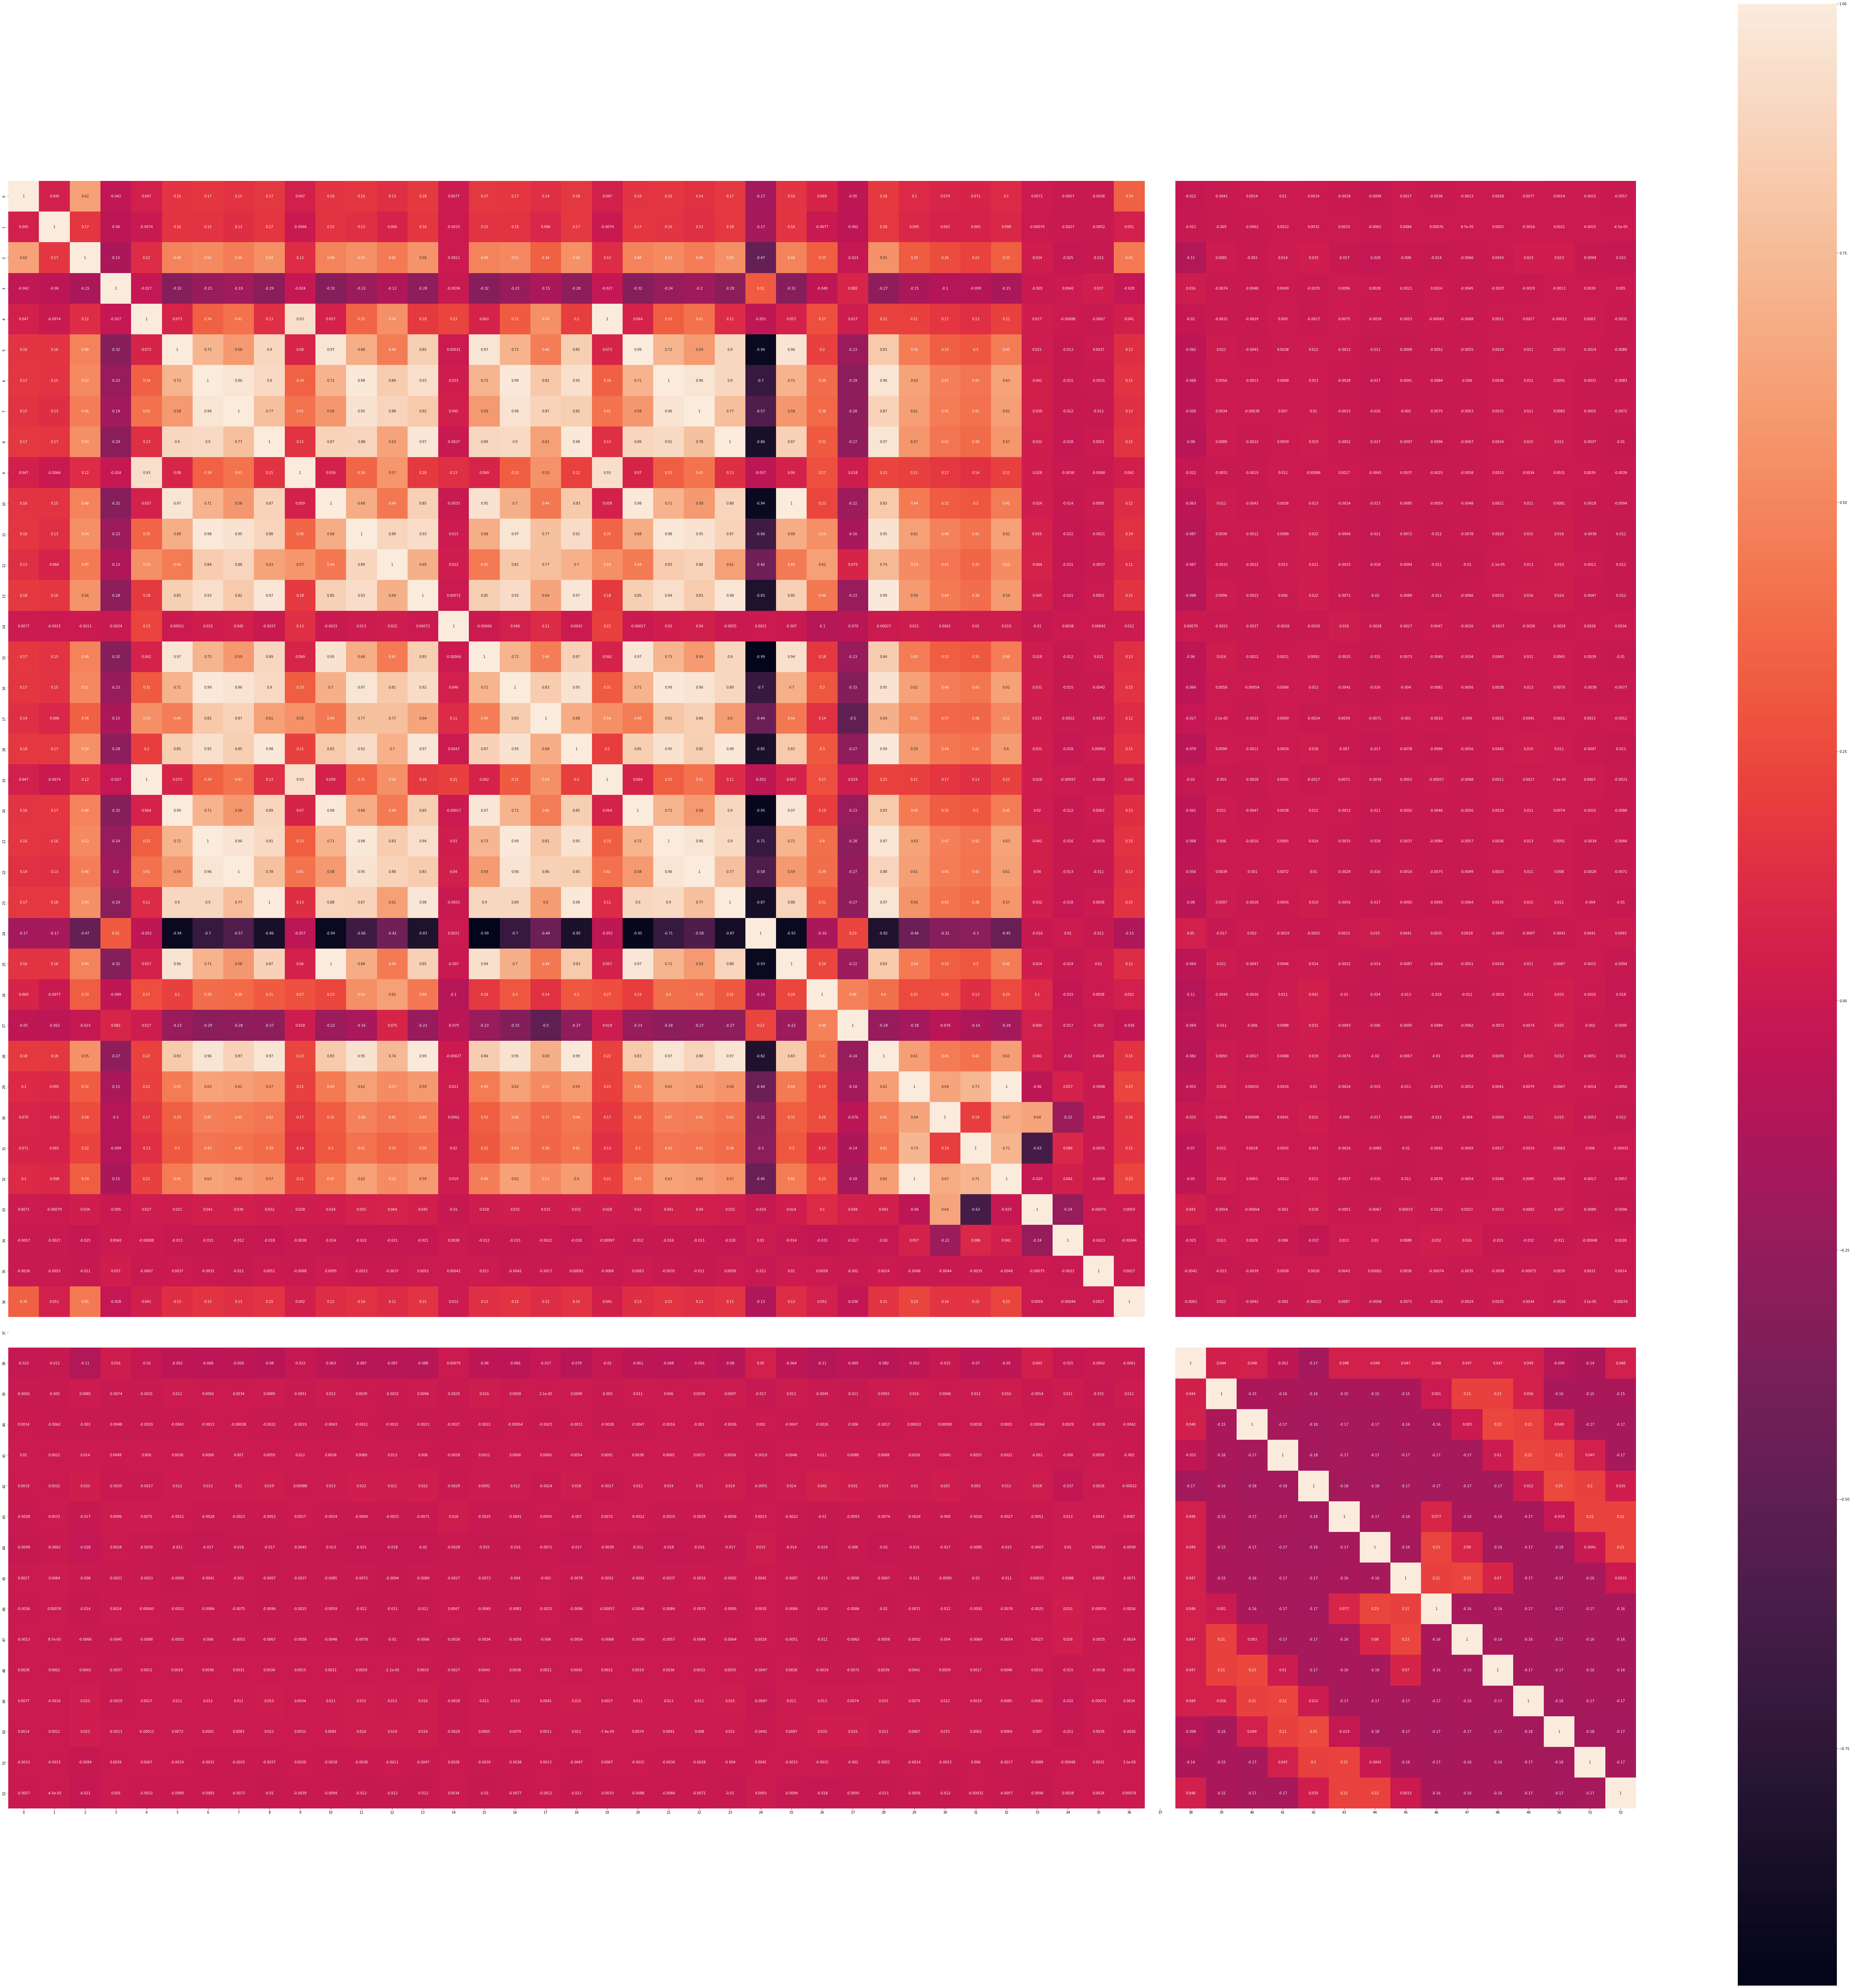

In [11]:
#dibujo matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(total_attrs * 2, total_attrs * 2))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax,
    annot=True
)

ax.tick_params(labelsize = 10)

In [12]:
# verifico que clases tienen una correlación muy cercana a 1 pero que no sean iguales
# defino un umbral de correlación de 0.8
corr_th = 0.8
corr_counter = 0
corr_cols = []
for i in range(total_attrs - 1):
  for j in range(i + 1, total_attrs):
    if corr_matrix.iloc[i, j] >= corr_th:
      print(f'Los atributos {i} y {j} son muy parecidos. Correlación = {corr_matrix.iloc[i, j]}')
      if j not in corr_cols:
        corr_cols.append(j)
      corr_counter = corr_counter + 1
print(f'Total de coincidencias = {corr_counter}')
print(f'Total de columnas a borrar = {len(corr_cols)}')

Los atributos 4 y 9 son muy parecidos. Correlación = 0.9306898420285927
Los atributos 4 y 19 son muy parecidos. Correlación = 0.9998307127579574
Los atributos 5 y 8 son muy parecidos. Correlación = 0.8968148830000634
Los atributos 5 y 10 son muy parecidos. Correlación = 0.9684346396520094
Los atributos 5 y 13 son muy parecidos. Correlación = 0.8473147579619217
Los atributos 5 y 15 son muy parecidos. Correlación = 0.9678038185095186
Los atributos 5 y 18 son muy parecidos. Correlación = 0.8504761607884816
Los atributos 5 y 20 son muy parecidos. Correlación = 0.9937835001237161
Los atributos 5 y 23 son muy parecidos. Correlación = 0.8979222479914555
Los atributos 5 y 25 son muy parecidos. Correlación = 0.9596299221172676
Los atributos 5 y 28 son muy parecidos. Correlación = 0.8252075839358284
Los atributos 6 y 7 son muy parecidos. Correlación = 0.9632157807744525
Los atributos 6 y 8 son muy parecidos. Correlación = 0.9030362060933586
Los atributos 6 y 11 son muy parecidos. Correlación = 0

In [13]:
# si descarto las columnas donde la correlación es muy alta
X_train_lite = X_train.drop(corr_cols, axis=1)
X_train.shape, X_train_lite.shape, X_train.columns, X_train_lite.columns

((199030, 53),
 (199030, 34),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
             51, 52],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6, 14, 24, 26, 27, 29, 30, 31, 33, 34, 35,
             36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
             52],
            dtype='int64'))

### Reducción de dimensionalidad por PCA
Verifico por cuántos atributos necesito para llegar al 90% (si existe)


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
RANDOM_STATE = 17

pca = PCA(n_components=0.90, random_state=RANDOM_STATE).fit(X_scaled)
X_train_pca = pca.transform(X_scaled)

print(f'Por PCA se redujo a {X_train_pca.shape[1]} dimensiones')

Por PCA se redujo a 21 dimensiones


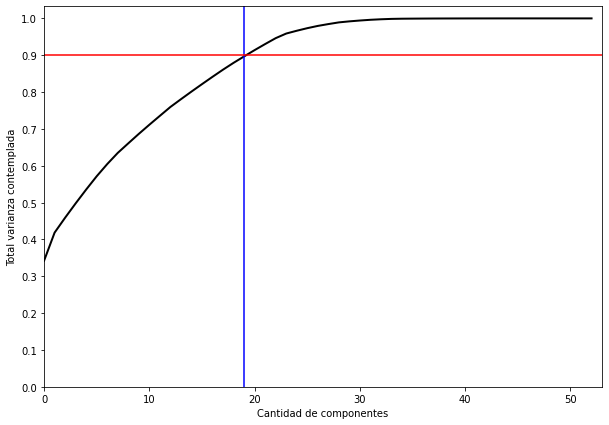

In [15]:
pca_2 = PCA(n_components=total_attrs, random_state=RANDOM_STATE).fit(X_scaled)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, total_attrs)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(19, c='b')
plt.axhline(0.9, c='r')
plt.show()



# NOTA: SIN EMBARGO PASA POR 19 -> WHY?

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

## Cargo dataset de validación

In [16]:
dataset_testing = './Dataset/Testing/Features_TestSet.csv'

data_testing = pd.read_csv(dataset_testing, header=None)

X_test = data_testing.iloc[:,:-1]
y_test = data_testing.iloc[:,-1:]

In [17]:
data_testing.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,1.004400e+04,1.004400e+04,1.004400e+04,10044.000000,10044.000000,10044.000000,10044.000000,10044.00000,10044.000000,10044.000000,...,10044.000000,10044.000000,10044.000000,10044.000000,10044.0,10044.0,10044.000000,10044.000000,10044.000000,10044.000000
mean,4.173831e+06,6.222970e+03,2.810706e+05,21.563720,9.766428,734.498805,100.733971,58.73178,131.533645,5.146555,...,0.247312,0.227897,0.336221,0.198726,0.0,0.0,0.088112,0.177917,0.199024,29.240442
std,9.686751e+06,4.097171e+04,5.078359e+05,19.533029,81.358195,833.752420,161.713386,131.19667,155.215035,49.847123,...,0.431471,0.419497,0.472439,0.399061,0.0,0.0,0.283472,0.382462,0.399286,115.033422
min,2.030000e+02,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,5.907070e+05,0.000000e+00,2.493400e+04,9.000000,0.000000,63.000000,11.764706,6.00000,13.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.501468e+06,0.000000e+00,8.886400e+04,16.000000,0.000000,351.000000,61.916667,20.00000,75.184910,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.000000
75%,4.290409e+06,4.050000e+01,3.295300e+05,28.000000,0.000000,1154.000000,124.181818,60.00000,209.073696,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,13.000000
max,1.626244e+08,1.100558e+06,6.784263e+06,107.000000,2575.000000,2858.000000,2575.000000,2575.00000,1101.000000,1672.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,2412.000000


## 1. Regresión lineal

In [18]:
#funciones para cálculo del error

def rms(y, y_hat): 
  return sqrt(mean_squared_error(y, y_hat))

### 1.a. Regresión lineal con todos los atributos

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Creación y entrenamiento del modelo
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

#defino arrays con los sets a tratar
lin_reg.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Text(0.5, 1.0, 'Parámetros del modelo')

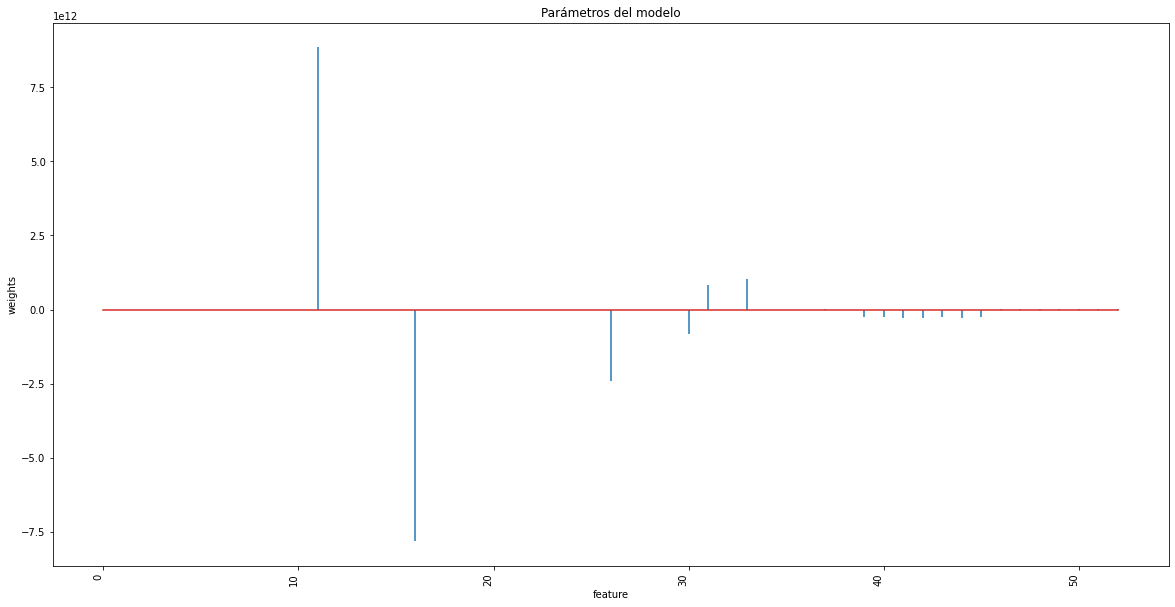

In [20]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lin_reg.steps[1][1].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [21]:
# Predicciones test

y_predicted = lin_reg.predict(X=X_test)
y_predicted = y_predicted.flatten()
for i in range(10):
  print(f'Valor predecido={y_predicted[i]}, Valor real={y_test.iloc[i, 0]}')

Valor predecido=6.613909734657096, Valor real=1
Valor predecido=5.310206426551627, Valor real=0
Valor predecido=-3.919560419151498, Valor real=0
Valor predecido=2.5212154521253574, Valor real=0
Valor predecido=3.0384884013441074, Valor real=1
Valor predecido=1220.4284315242078, Valor real=292
Valor predecido=5.107213987281607, Valor real=0
Valor predecido=7.93519498245983, Valor real=0
Valor predecido=7.303004278114127, Valor real=1
Valor predecido=129.35866834061412, Valor real=47


In [22]:
#calculo el error de la predicción
all_attrs_rms = rms(y_test, y_predicted)
print(f'RMS = {all_attrs_rms}')

RMS = 108.44624486453077


In [47]:
R2 = metrics.r2_score(y_test, y_predicted)
R2

0.11115874700738826

### 1.b. Regresión lineal sólo con los atributos quitados por la matriz de correlación

In [23]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # Creación y entrenamiento del modelo
# from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

# # obtengo el nro de componentes post pca
# pca_n_pcs= pca.components_.shape[0]
# # obtengo los indices de las componentes de pca más importantes
# pca_most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca_n_pcs)]

# ajusto la regresión lineal
#lin_reg = LinearRegression()
lin_reg.fit(X_train_lite, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Text(0.5, 1.0, 'Parámetros del modelo')

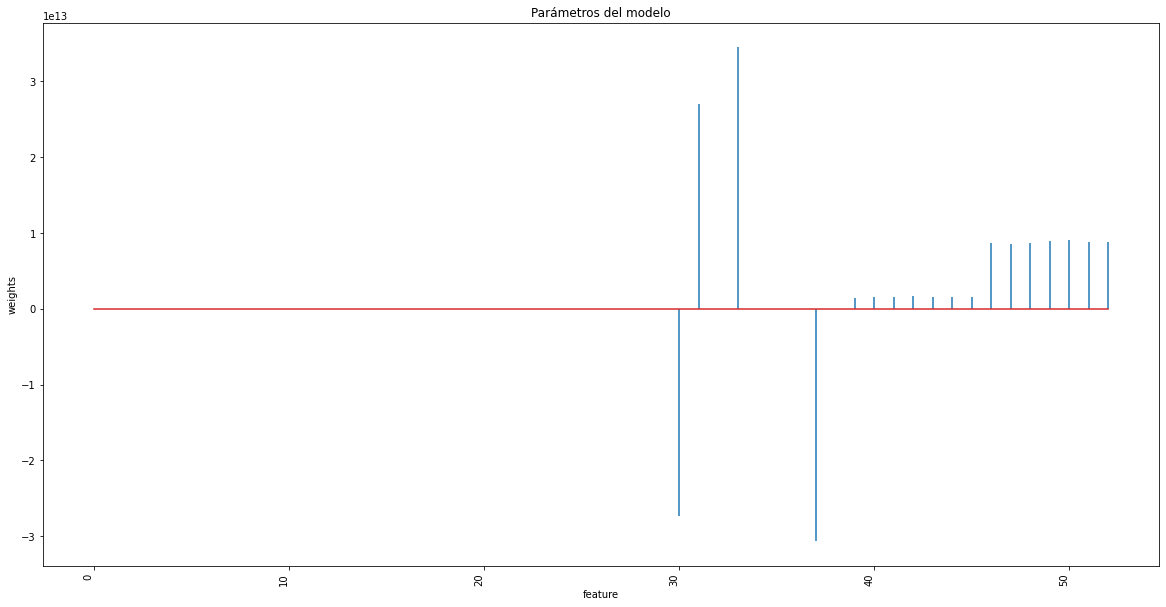

In [24]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_lite.columns,
                         'coef': lin_reg.steps[1][1].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [25]:
# Predicciones test

# reduzco el test en componentes segun la matriz de correlacion
X_test_lite = X_test.drop(corr_cols, axis=1)

y_lite_predicted = lin_reg.predict(X=X_test_lite)
y_lite_predicted = y_lite_predicted.flatten()
for i in range(10):
  print(f'Valor predecido={y_lite_predicted[i]}, Valor real={y_test.iloc[i, 0]}')

Valor predecido=5.5919860977246225, Valor real=1
Valor predecido=4.1720642227246225, Valor real=0
Valor predecido=-4.2849670272753775, Valor real=0
Valor predecido=1.3654235977246225, Valor real=0
Valor predecido=2.2912048477246225, Valor real=1
Valor predecido=538.3830017227247, Valor real=292
Valor predecido=8.533392347724622, Valor real=0
Valor predecido=11.332220472724622, Valor real=0
Valor predecido=10.734564222724622, Valor real=1
Valor predecido=133.10956422272463, Valor real=47


In [26]:
#calculo el error de la predicción
corr_attrs_rms = rms(y_test, y_lite_predicted)
print(f'RMS = {corr_attrs_rms}')


RMS = 106.18754200227075


In [49]:
R2 = metrics.r2_score(y_test, y_lite_predicted)
R2

0.1477984847408904

### 1.c. Regresión lineal sólo con los atributos de PCA

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Creación y entrenamiento del modelo
from sklearn.pipeline import make_pipeline

# obtengo el nro de componentes post pca
pca_n_pcs= pca.components_.shape[0]
# obtengo los indices de las componentes de pca más importantes
pca_most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca_n_pcs)]
# reduzco el test en componentes para pca
X_test_pca = X_test[pca_most_important]

# ajusto la regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)

LinearRegression()

Text(0.5, 1.0, 'Parámetros del modelo')

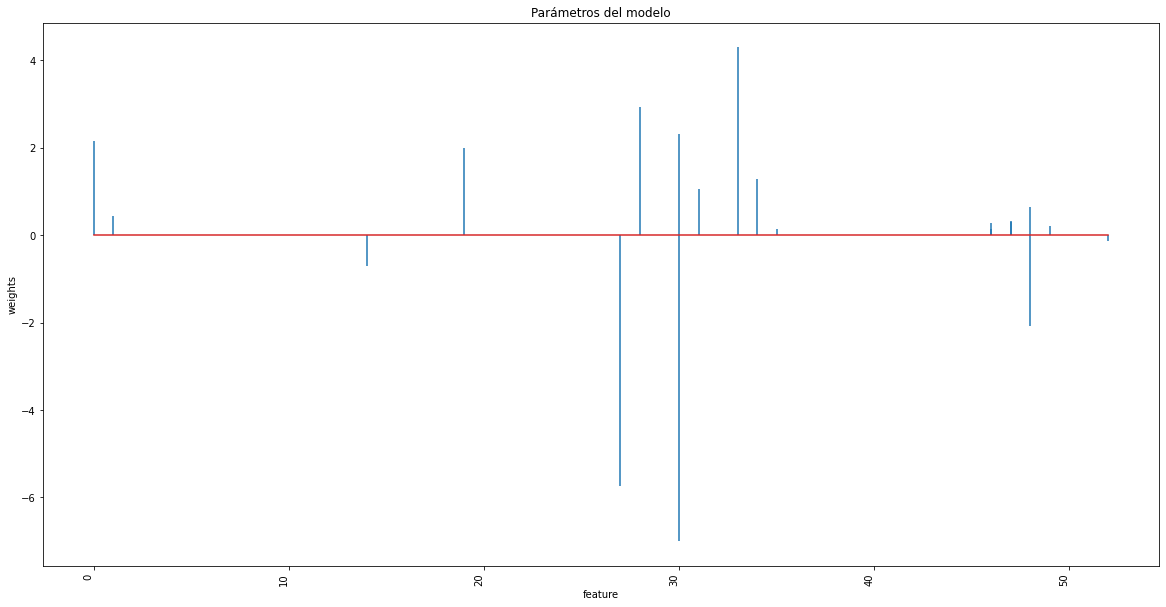

In [28]:
df_coeficientes = pd.DataFrame(
                        {'predictor': pca_most_important,
                         'coef': lin_reg.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [29]:
# ajusto el test de pca
# Estandarizamos
scaler = StandardScaler()
X_test_pca = scaler.fit_transform(X_test)
X_test_pca = X_test_pca[:, pca_most_important]

# hago la predicción en el test de prueba
y_pca_predicted = lin_reg.predict(X_test_pca)

for i in range(10):
  print(f'Valor predecido={y_pca_predicted[i]}, Valor real={y_test.iloc[i, 0]}')


Valor predecido=[4.25060032], Valor real=1
Valor predecido=[5.12430306], Valor real=0
Valor predecido=[4.28727759], Valor real=0
Valor predecido=[7.24649606], Valor real=0
Valor predecido=[7.01516858], Valor real=1
Valor predecido=[-52.76790913], Valor real=292
Valor predecido=[11.34167031], Valor real=0
Valor predecido=[8.68567805], Valor real=0
Valor predecido=[9.38148467], Valor real=1
Valor predecido=[6.21627786], Valor real=47


In [30]:

# calculo errores
pca_attrs_rms = rms(y_test, y_pca_predicted)

print(f'RMS = {pca_attrs_rms}')

RMS = 117.82630635189794


In [50]:
R2 = metrics.r2_score(y_test, y_pca_predicted)
R2

-0.049251727996441286

### Conclusiones

En base a los resultados obtenidos, el menor error se dió para el caso 1.b donde se tomó una selección de los parámetros según la matriz de correlación. Se toma a la misma como la base para el cálculo de la regresión Ridge y Lasso

## 2. Regresiones polinómicas  
  
### 2.a Regresión Ridge

In [31]:
modelo_ridge = make_pipeline(StandardScaler(with_mean=True), RidgeCV(
            alphas          = np.logspace(-10, 10, 200),
            fit_intercept   = True,
            store_cv_values = True))
modelo_ridge.fit(X = X_train_lite, y = y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
                         store_cv_values=True))])

/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.39941e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.42725e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


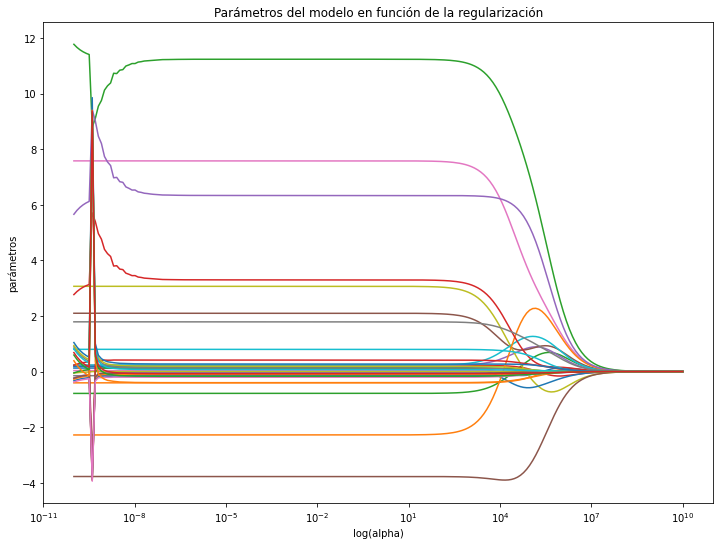

In [32]:
# Evolución de los parámetros en función de alpha

alphas = modelo_ridge.steps[1][1].alphas
coefs = []

for alpha in alphas:

    modelo_ridge_temp = make_pipeline(StandardScaler(with_mean=True), Ridge(
            alpha=alpha, fit_intercept=False))

    modelo_ridge_temp.fit(X_train_lite, y_train)
    coefs.append(modelo_ridge_temp.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 8.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización')
plt.axis('tight')
plt.show()

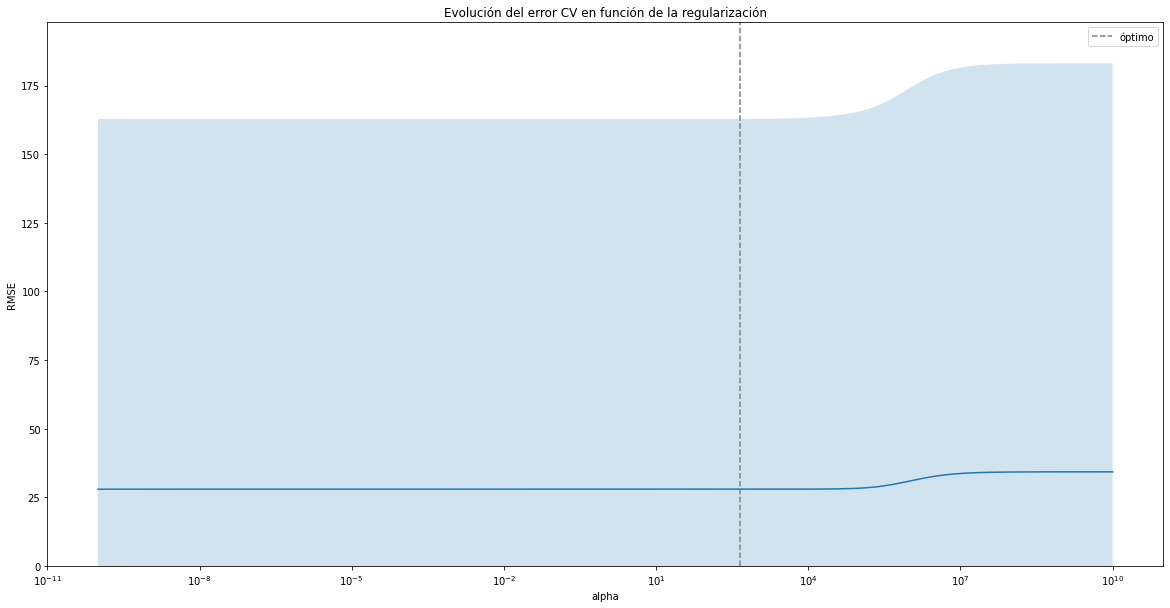

In [33]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)

mse_cv = modelo_ridge.steps[1][1].cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo_ridge.steps[1][1].cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = modelo_ridge.steps[1][1].alphas[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar (fill area)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(modelo_ridge.steps[1][1].alphas, rmse_cv)
ax.fill_between(
    modelo_ridge.steps[1][1].alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [34]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {modelo_ridge.steps[1][1].alpha_}")

Mejor valor de alpha encontrado: 460.5922041145113


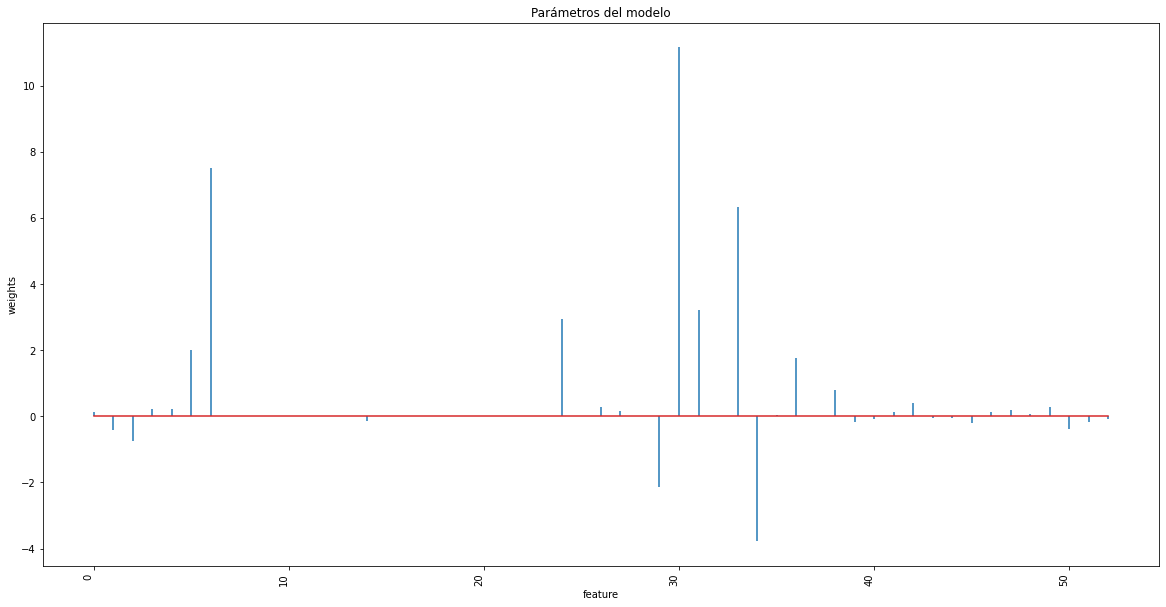

In [35]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_lite.columns,
                         'coef': modelo_ridge.steps[1][1].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [36]:
# Predicciones test

y_model_ridge_predicted = modelo_ridge.predict(X = X_test_lite)
y_model_ridge_predicted = y_model_ridge_predicted.flatten()
y_model_ridge_predicted[:10]

array([  5.57047093,   4.20275145,  -4.07735522,   1.3639748 ,
         2.38753715, 538.00135364,   8.52920444,  11.363999  ,
        10.76196196, 133.09367092])

In [37]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = y_model_ridge_predicted,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 106.17988783852881


In [38]:
R2 = metrics.r2_score(y_test, y_model_ridge_predicted)
R2

0.14792133634336413

### 2.b Regresión Lasso

In [39]:
modelo_lasso = make_pipeline(StandardScaler(with_mean=True), LassoCV(
            alphas          = np.logspace(-10, 10, 200),
            cv              = 10
         ))

modelo_lasso.fit(X = X_train_lite, y = y_train.to_numpy().flatten())


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
                         cv=10))])

/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.956e+05, tolerance: 2.444e+04
  model = cd_fast.enet_coordinate_descent(
/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.954e+05, tolerance: 2.444e+04
  model = cd_fast.enet_coordinate_descent(
/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

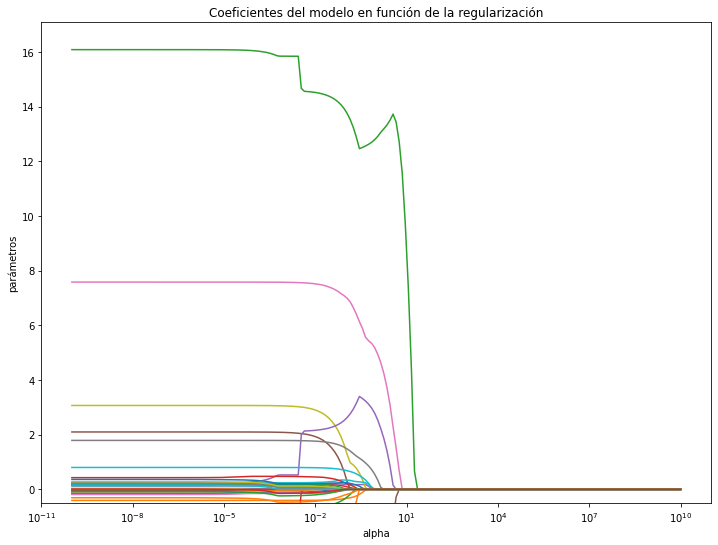

In [41]:
# Evolución de los parámetros en función de alpha

alphas = modelo_lasso.steps[1][1].alphas_
coefs = []

for alpha in alphas:
    # modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp = make_pipeline(StandardScaler(with_mean=True), Lasso(
        alpha=alpha, fit_intercept=False))

    modelo_temp.fit(X_train_lite, y_train)
    coefs.append(modelo_temp.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 8.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.set_title('Coeficientes del modelo en función de la regularización')

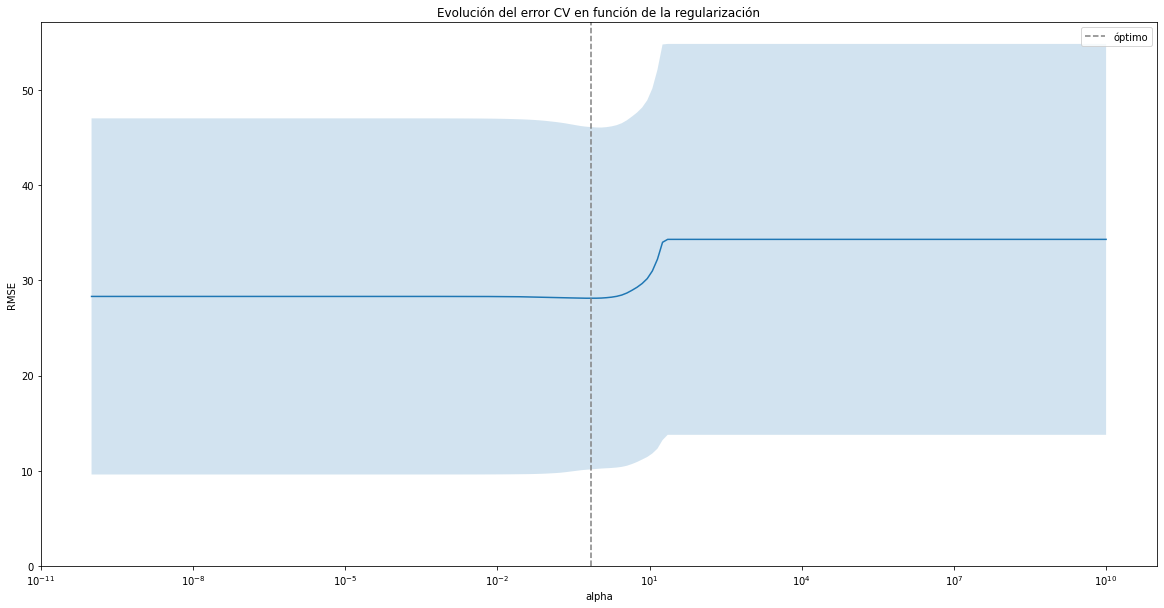

In [42]:
# Evolución del error de validación cruzada en función de alpha

mse_cv = modelo_lasso.steps[1][1].mse_path_.mean(axis=1)
mse_sd = modelo_lasso.steps[1][1].mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = modelo_lasso.steps[1][1].alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(modelo_lasso.steps[1][1].alphas_, rmse_cv)
ax.fill_between(
    modelo_lasso.steps[1][1].alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()
plt.show()

In [43]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {modelo_lasso.steps[1][1].alpha_}")

Mejor valor de alpha encontrado: 0.7067181273927506


In [44]:
y_modelo_lasso_predicted = modelo_lasso.predict(X=X_test_lite)
y_modelo_lasso_predicted = y_modelo_lasso_predicted.flatten()
y_modelo_lasso_predicted[:10]

array([  6.22366313,   4.41253859,   5.20401575,   1.50115347,
         6.38783176, 409.79298775,   3.76746519,   6.89522204,
         6.61479097, 127.50808611])

In [45]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = y_modelo_lasso_predicted,
                squared = False
             )
print(f"El error (rmse) de test es: {rmse_lasso}")

El error (rmse) de test es: 106.13429634929044


In [46]:
R2 = metrics.r2_score(y_test, y_modelo_lasso_predicted)
R2

0.14865290982386647

## Conclusiones de errores entre las diferentes regresiones


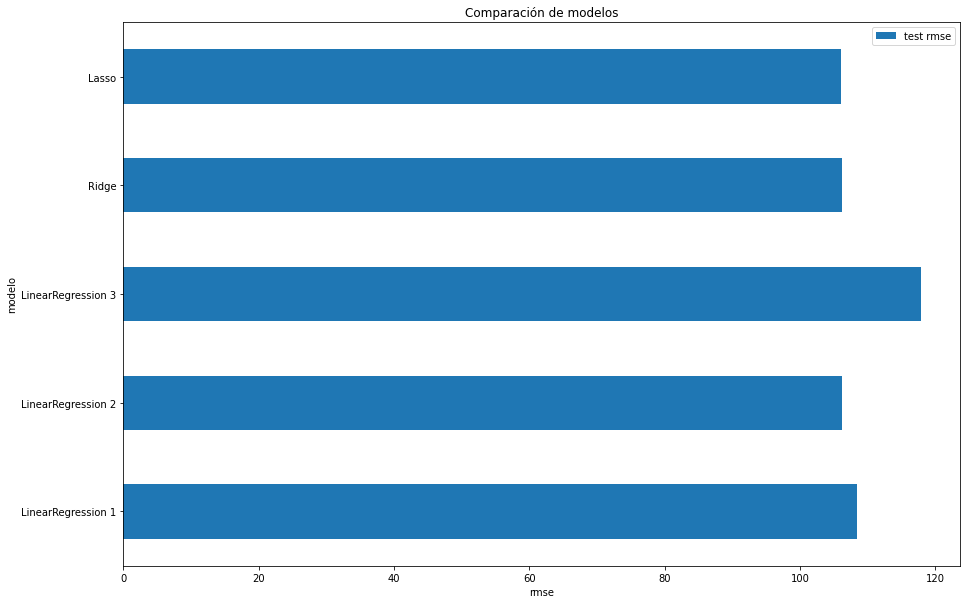

In [52]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression','Ridge', 'Lasso'],
                    'test rmse': [corr_attrs_rms, rmse_ridge, rmse_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');